In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv("thirdwave.csv")
df.head()

,Name,Review,Order Type,Rating,Date
0,DRISHTI SINGHANIA,NaN,DELIVERY,4.1,2 days ago
1,Aadnya Naik,Order was given too late by the restaurant.,DELIVERY,4.1,6 days ago
2,ANUJ JHAVERI,NaN,DELIVERY,5.0,11 days ago
3,Ananya Tanwar,NaN,DELIVERY,3.0,13 days ago
4,Nachiket Huilgol,NaN,DELIVERY,2.0,17 days ago


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('thirdwave.csv')  # Replace 'your_dataset.csv' with the actual file name

# Check the distribution of ratings in different ranges
rating_ranges = {
    '0-1': df[(df['Rating'] >= 0) & (df['Rating'] < 1)].shape[0],
    '1-2': df[(df['Rating'] >= 1) & (df['Rating'] < 2)].shape[0],
    '2-3': df[(df['Rating'] >= 2) & (df['Rating'] < 3)].shape[0],
    '3-4': df[(df['Rating'] >= 3) & (df['Rating'] < 4)].shape[0],
    '4-5': df[(df['Rating'] >= 4) & (df['Rating'] <= 5)].shape[0],
}

# Print the results
for rating_range, count in rating_ranges.items():
    print(f"Number of ratings in range {rating_range}: {count}")


Number of ratings in range 0-1: 0
Number of ratings in range 1-2: 42
Number of ratings in range 2-3: 19
Number of ratings in range 3-4: 13
Number of ratings in range 4-5: 301


In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Average Rating: 3.92


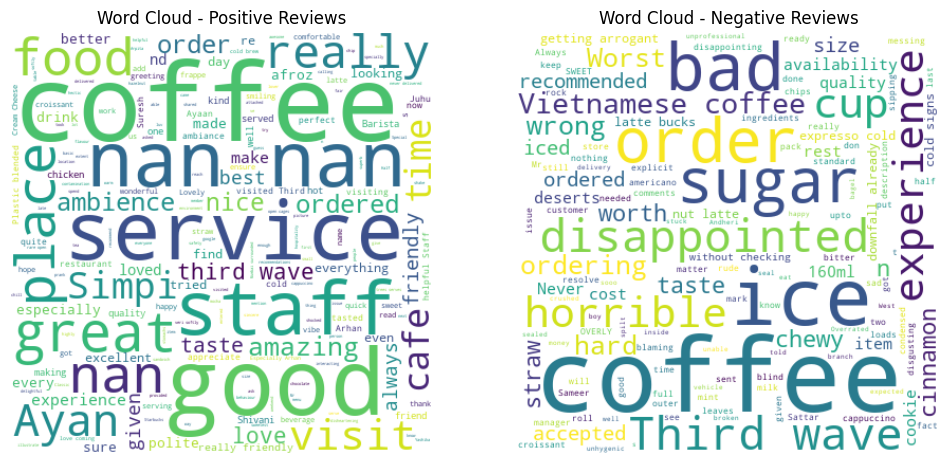

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('thirdwave.csv') 

# Convert 'Review' column to string to handle potential float values
df['Review'] = df['Review'].astype(str)

# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Review'].apply(lambda x: 'positive' if sid.polarity_scores(x)['compound'] >= 0 else 'negative')

# Average Rating
average_rating = df['Rating'].mean()
print(f"Average Rating: {average_rating:.2f}")

# Word Cloud for Positive and Negative Reviews
positive_reviews = ' '.join(df[df['Sentiment'] == 'positive']['Review'])
negative_reviews = ' '.join(df[df['Sentiment'] == 'negative']['Review'])

# Plotting Word Clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

wordcloud_positive = WordCloud(width=400, height=400, background_color='white').generate(positive_reviews)
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].set_title('Word Cloud - Positive Reviews')
axes[0].axis('off')

wordcloud_negative = WordCloud(width=400, height=400, background_color='white').generate(negative_reviews)
axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].set_title('Word Cloud - Negative Reviews')
axes[1].axis('off')

plt.show()


In [7]:
df.head()

,Name,Review,Order Type,Rating,Date,Sentiment
0,DRISHTI SINGHANIA,nan,DELIVERY,4.1,2 days ago,positive
1,Aadnya Naik,Order was given too late by the restaurant.,DELIVERY,4.1,6 days ago,positive
2,ANUJ JHAVERI,nan,DELIVERY,5.0,11 days ago,positive
3,Ananya Tanwar,nan,DELIVERY,3.0,13 days ago,positive
4,Nachiket Huilgol,nan,DELIVERY,2.0,17 days ago,positive


Average Rating (Overall): 3.92
Average Rating for Dining: 4.07
Average Rating for Delivery: 3.83


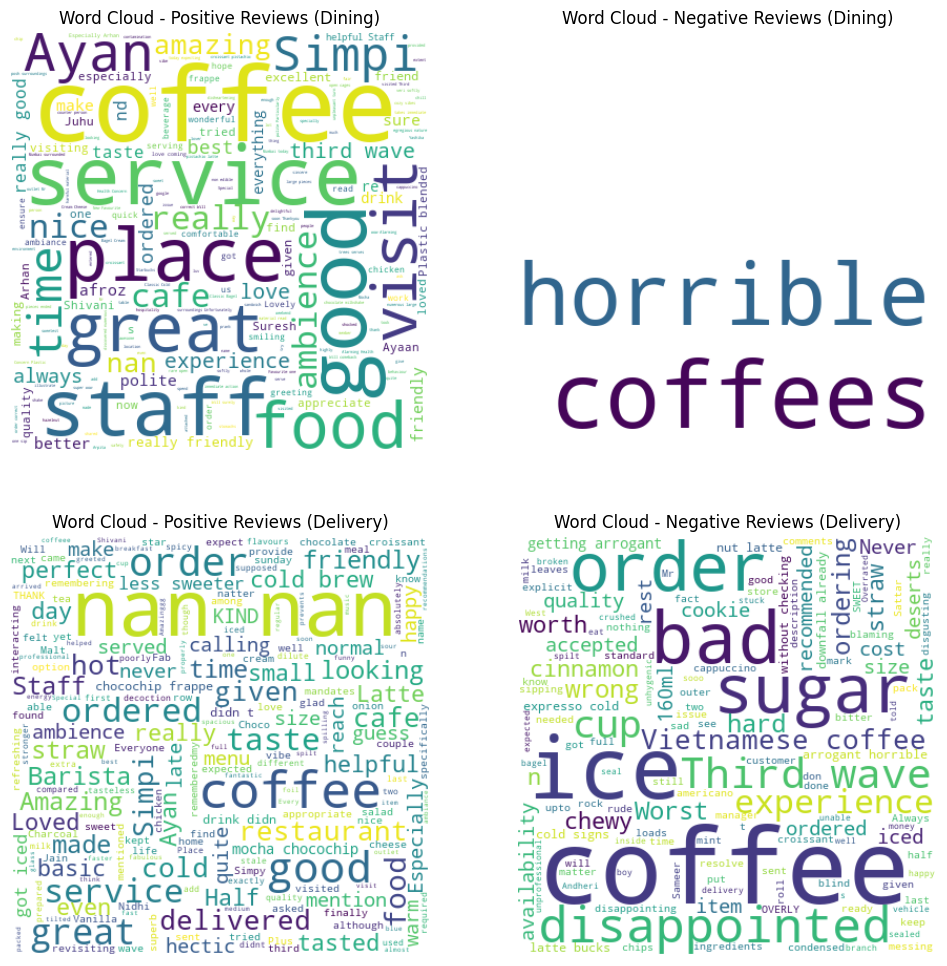

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('thirdwave.csv')  # Replace 'your_dataset.csv' with the actual file name

# Convert 'Review' column to string to handle potential float values
df['Review'] = df['Review'].astype(str)

# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Review'].apply(lambda x: 'positive' if sid.polarity_scores(x)['compound'] >= 0 else 'negative')

# Average Rating
average_rating = df['Rating'].mean()
print(f"Average Rating (Overall): {average_rating:.2f}")

# Separate data for Dining and Delivery
df_dining = df[df['Order Type'] == 'DINING']
df_delivery = df[df['Order Type'] == 'DELIVERY']

# Average Rating for Dining
average_rating_dining = df_dining['Rating'].mean()
print(f"Average Rating for Dining: {average_rating_dining:.2f}")

# Average Rating for Delivery
average_rating_delivery = df_delivery['Rating'].mean()
print(f"Average Rating for Delivery: {average_rating_delivery:.2f}")

# Word Cloud for Positive and Negative Reviews in Dining
positive_reviews_dining = ' '.join(df_dining[df_dining['Sentiment'] == 'positive']['Review'])
negative_reviews_dining = ' '.join(df_dining[df_dining['Sentiment'] == 'negative']['Review'])

# Word Cloud for Positive and Negative Reviews in Delivery
positive_reviews_delivery = ' '.join(df_delivery[df_delivery['Sentiment'] == 'positive']['Review'])
negative_reviews_delivery = ' '.join(df_delivery[df_delivery['Sentiment'] == 'negative']['Review'])

# Plotting Word Clouds
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

wordcloud_positive_dining = WordCloud(width=400, height=400, background_color='white').generate(positive_reviews_dining)
axes[0, 0].imshow(wordcloud_positive_dining, interpolation='bilinear')
axes[0, 0].set_title('Word Cloud - Positive Reviews (Dining)')
axes[0, 0].axis('off')

wordcloud_negative_dining = WordCloud(width=400, height=400, background_color='white').generate(negative_reviews_dining)
axes[0, 1].imshow(wordcloud_negative_dining, interpolation='bilinear')
axes[0, 1].set_title('Word Cloud - Negative Reviews (Dining)')
axes[0, 1].axis('off')

wordcloud_positive_delivery = WordCloud(width=400, height=400, background_color='white').generate(positive_reviews_delivery)
axes[1, 0].imshow(wordcloud_positive_delivery, interpolation='bilinear')
axes[1, 0].set_title('Word Cloud - Positive Reviews (Delivery)')
axes[1, 0].axis('off')

wordcloud_negative_delivery = WordCloud(width=400, height=400, background_color='white').generate(negative_reviews_delivery)
axes[1, 1].imshow(wordcloud_negative_delivery, interpolation='bilinear')
axes[1, 1].set_title('Word Cloud - Negative Reviews (Delivery)')
axes[1, 1].axis('off')

plt.show()


In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('thirdwave.csv')  # Replace 'your_dataset.csv' with the actual file name

# Extract numeric values from 'Date' column
numeric_days = df['Date'].str.extract('(\d+)').astype(float)

# Replace non-numeric values with NaN
numeric_days = pd.to_numeric(numeric_days[0], errors='coerce')

# Convert 'Date' column to timedelta
df['DaysAgo'] = pd.to_timedelta(numeric_days, unit='D')

# Calculate the actual date
df['ActualDate'] = pd.to_datetime('today') - df['DaysAgo']

# Convert 'ActualDate' column to standard datetime format
df['ActualDate'] = pd.to_datetime(df['ActualDate'])

# Extract only the date portion
df['ActualDate'] = df['ActualDate'].dt.date



In [11]:
df.head()

,Name,Review,Order Type,Rating,Date,DaysAgo,ActualDate
0,DRISHTI SINGHANIA,NaN,DELIVERY,4.1,2 days ago,2 days,2024-02-15
1,Aadnya Naik,Order was given too late by the restaurant.,DELIVERY,4.1,6 days ago,6 days,2024-02-11
2,ANUJ JHAVERI,NaN,DELIVERY,5.0,11 days ago,11 days,2024-02-06
3,Ananya Tanwar,NaN,DELIVERY,3.0,13 days ago,13 days,2024-02-04
4,Nachiket Huilgol,NaN,DELIVERY,2.0,17 days ago,17 days,2024-01-31


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv('thirdwave.csv')

# Drop rows with NaN values
df = df.dropna(subset=['Review', 'Rating'])

# Preprocess the data
df['Sentiment'] = df['Rating'].apply(lambda x: 'bad' if x < 3 else ('neutral' if x == 3 else 'good'))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)

# Create a pipeline with CountVectorizer and RandomForestClassifier
model = make_pipeline(CountVectorizer(), RandomForestClassifier(n_estimators=100, random_state=42))

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, predictions))


Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

         bad       1.00      0.89      0.94         9
        good       0.95      1.00      0.97        39
     neutral       1.00      0.50      0.67         2

    accuracy                           0.96        50
   macro avg       0.98      0.80      0.86        50
weighted avg       0.96      0.96      0.96        50



In [13]:
new_review = input("Enter your review: ")

# Use the trained model to predict sentiment
predicted_sentiment = model.predict([new_review])

# Print the predicted sentiment
print(f"Predicted Sentiment: {predicted_sentiment[0]}")


Predicted Sentiment: good
